In [1]:
import os

In [2]:
os.chdir("../scripts")

## Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and logging.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from importlib import reload


import data_cleaning as dc
import vis_distribution_of_promotion as vdp
import sales_behavior_during_holidays as sbdh
import seasonal_purchase_behaviors as spb
import correlation as cr
import effect_of_promotions as eop
import effectiveness_of_promotions as effop
import customer_behavior as cb
import average_sale_on_weekend as asow
import effect_of_assortment as eoa
import effect_of_distance as eod

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set plot style
sns.set(style="whitegrid")

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load Data
Load the datasets: sample_submission.csv, store.csv, test.csv, and train.csv.

In [4]:
# Load Data

# Load the datasets
train_df = pd.read_csv('../assets/datas/train.csv')
test_df = pd.read_csv('../assets/datas/test.csv')
store_df = pd.read_csv('../assets/datas/store.csv')
sample_submission_df = pd.read_csv('../assets/datas/sample_submission.csv')

# Log the loading of data
logging.info('Datasets loaded successfully')

# Display the first few rows of each dataframe to verify
train_df.head(), test_df.head(), store_df.head(), sample_submission_df.head()

/tmp/ipykernel_222906/154599402.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../assets/datas/train.csv')
2025-03-11 18:09:21,978 - INFO - Datasets loaded successfully


(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  
 2              1  
 3              1  
 4              1  ,
    Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
 0   1      1          4  2015-09-17   1.0      1            0              0
 1   2      3          4  2015-09-17   1.0      1            0              0
 2   3      7          4  2015-09-17   1.0      1            0              0
 3   4      8          4  2015-09-17   1.0      1            0              0
 4   5 

# Data Cleaning
Build pipelines to detect and handle outliers and missing data.

In [5]:
reload(dc)

# Apply data cleaning functions to the datasets
train_df = dc.handle_missing_data(train_df)
test_df = dc.handle_missing_data(test_df)
store_df = dc.handle_missing_data(store_df)

# Handle outliers in the 'Sales' column of the training data
train_df = dc.handle_outliers(train_df, 'Sales')

# Display the cleaned data
train_df.head(), test_df.head(), store_df.head()

2025-03-11 18:09:27,561 - INFO - Initial missing data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/data_cleaning.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method=method, inplace=True)  # Uses ffill or bfill
2025-03-11 18:09:27,983 - INFO - Final missing data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
2025-03-11 18:09:27,993 - INFO - Initial missing data:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
2025-03-11 18:0

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  
 2              1  
 3              1  
 4              1  ,
    Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
 0   1      1          4  2015-09-17   1.0      1            0              0
 1   2      3          4  2015-09-17   1.0      1            0              0
 2   3      7          4  2015-09-17   1.0      1            0              0
 3   4      8          4  2015-09-17   1.0      1            0              0
 4   5 

# Distribution of Promotions
Check for distribution of promotions in both training and test sets.

2025-03-11 18:14:26,157 - INFO - Starting Promotion Distribution Visualization...


2025-03-11 18:14:28,084 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/vis_distribution_of_promotion.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Promo', data=df, palette="Blues")
2025-03-11 18:14:29,271 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


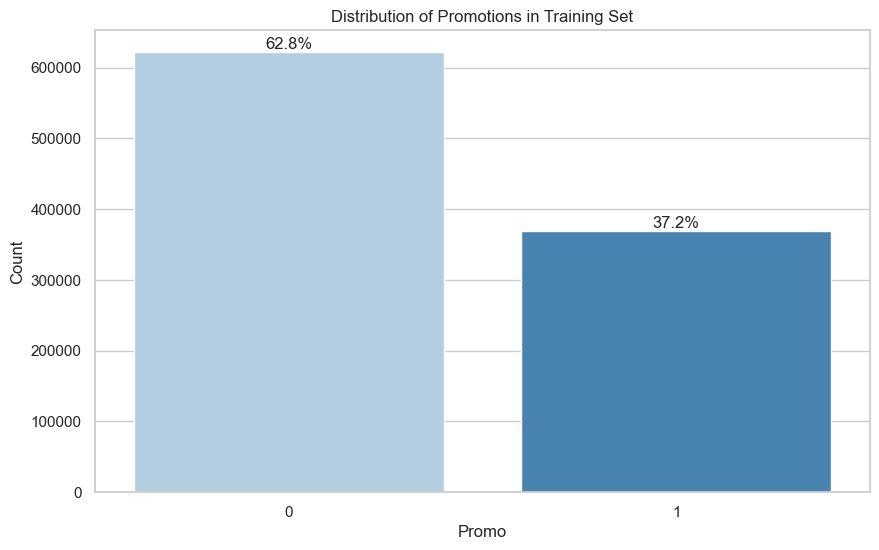

2025-03-11 18:14:30,205 - INFO - Distribution of Promotions in Training Set:
Promo
0    0.627575
1    0.372425
Name: proportion, dtype: float64
2025-03-11 18:14:30,363 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/vis_distribution_of_promotion.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Promo', data=df, palette="Blues")
2025-03-11 18:14:30,422 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


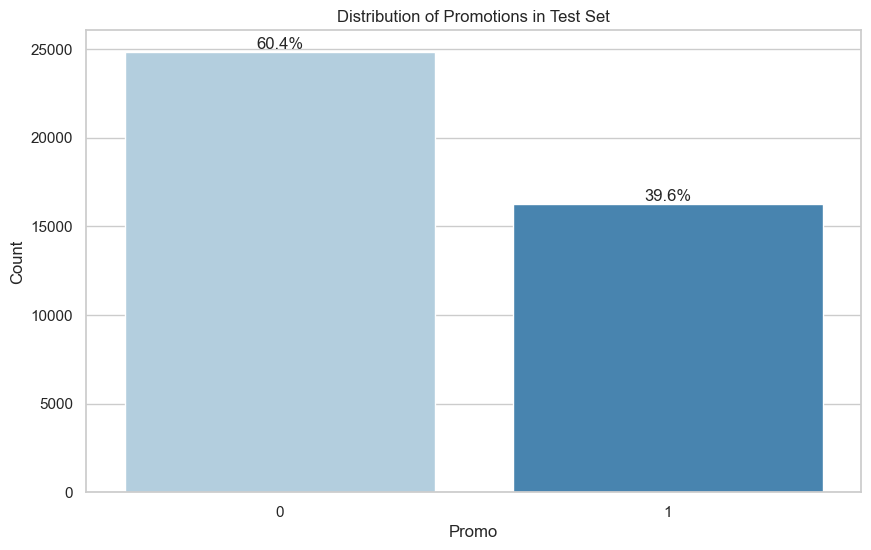

2025-03-11 18:14:30,612 - INFO - Distribution of Promotions in Test Set:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


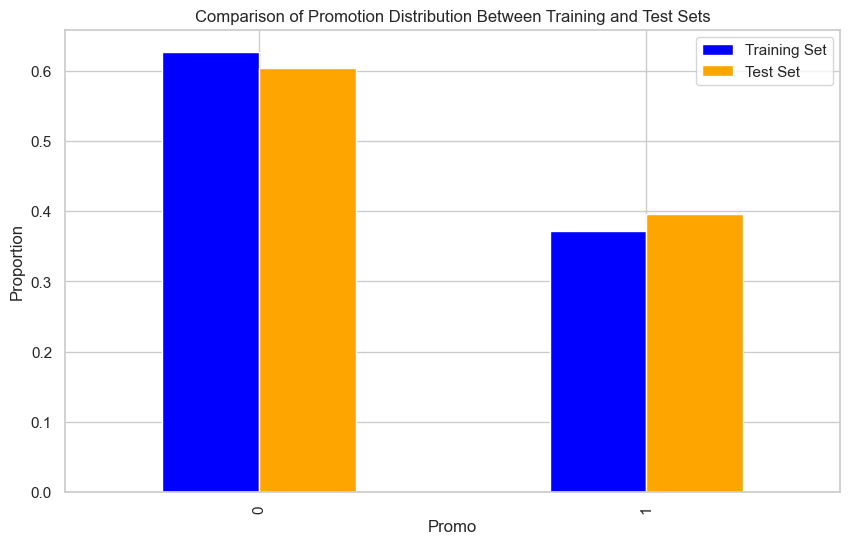

2025-03-11 18:14:31,014 - INFO - Comparison of Promotion Distribution Between Training and Test Sets:
   Promo  Training Set  Test Set
0      0      0.627575  0.604167
1      1      0.372425  0.395833
2025-03-11 18:14:31,016 - INFO - Visualization Completed!


In [6]:
reload(vdp)

vdp.vis(train_df, test_df)


# Sales Behavior During Holidays
Compare sales behavior before, during, and after holidays.

2025-03-11 18:17:37,547 - INFO - Starting holiday sales analysis...


2025-03-11 18:17:38,451 - INFO - Holiday-related columns created successfully


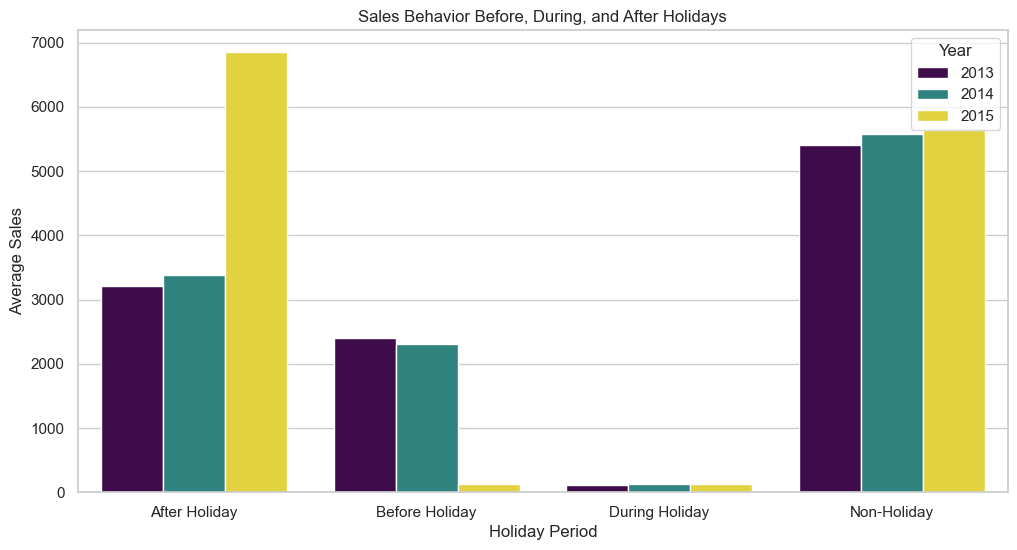

2025-03-11 18:17:39,396 - INFO - Sales behavior during holidays:
    Year   HolidayPeriod        Sales
0   2013   After Holiday  3210.518838
1   2013  Before Holiday  2398.115454
2   2013  During Holiday   116.881295
3   2013     Non-Holiday  5412.678701
4   2014   After Holiday  3384.590462
5   2014  Before Holiday  2310.262463
6   2014  During Holiday   127.840920
7   2014     Non-Holiday  5573.640723
8   2015   After Holiday  6849.059578
9   2015  Before Holiday   126.182718
10  2015  During Holiday   125.521661
11  2015     Non-Holiday  5631.201629
2025-03-11 18:17:39,398 - INFO - Holiday sales analysis completed!


In [7]:
reload(sbdh)

sbdh.holiday(train_df)

# Seasonal Purchase Behaviors
Analyze seasonal purchase behaviors such as Christmas and Easter.

2025-03-11 18:36:03,890 - INFO - Starting seasonal sales analysis...
2025-03-11 18:36:04,260 - INFO - Seasonal columns (Christmas and Easter) added successfully.
2025-03-11 18:36:04,315 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/seasonal_purchase_behaviors.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Sales', data=christmas_sales, palette='coolwarm')
2025-03-11 18:36:04,328 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


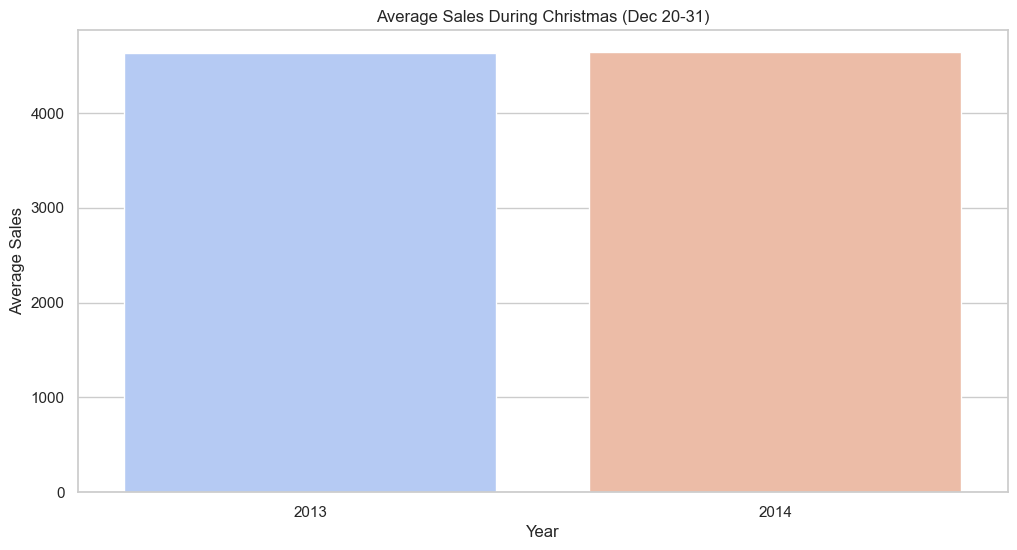

2025-03-11 18:36:04,534 - INFO - Sales behavior during Christmas:
   Year        Sales
0  2013  4627.178952
1  2014  4638.780591
2025-03-11 18:36:04,573 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/seasonal_purchase_behaviors.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Sales', data=easter_sales, palette='coolwarm')
2025-03-11 18:36:04,594 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


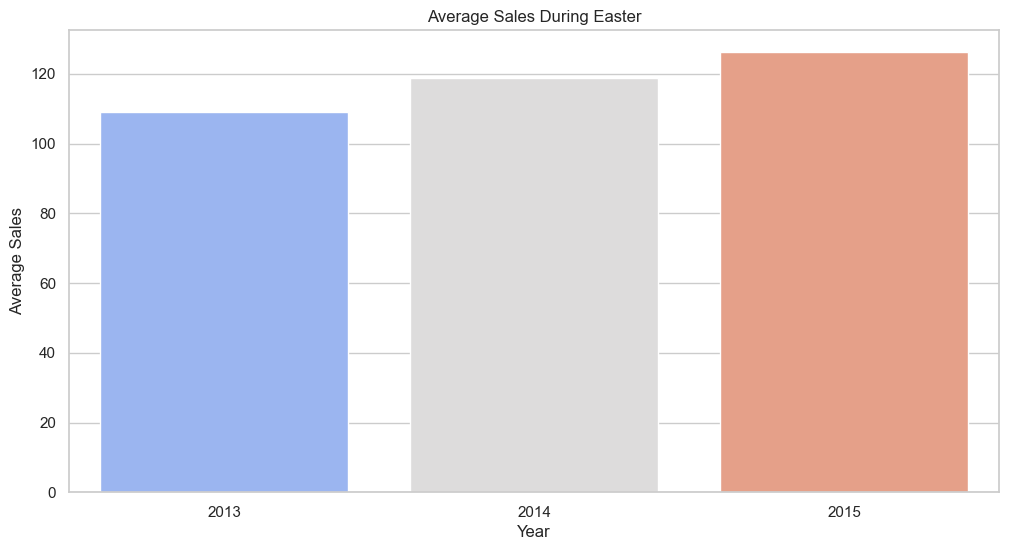

2025-03-11 18:36:04,965 - INFO - Sales behavior during Easter:
   Year       Sales
0  2013  109.184353
1  2014  118.937050
2  2015  126.182718


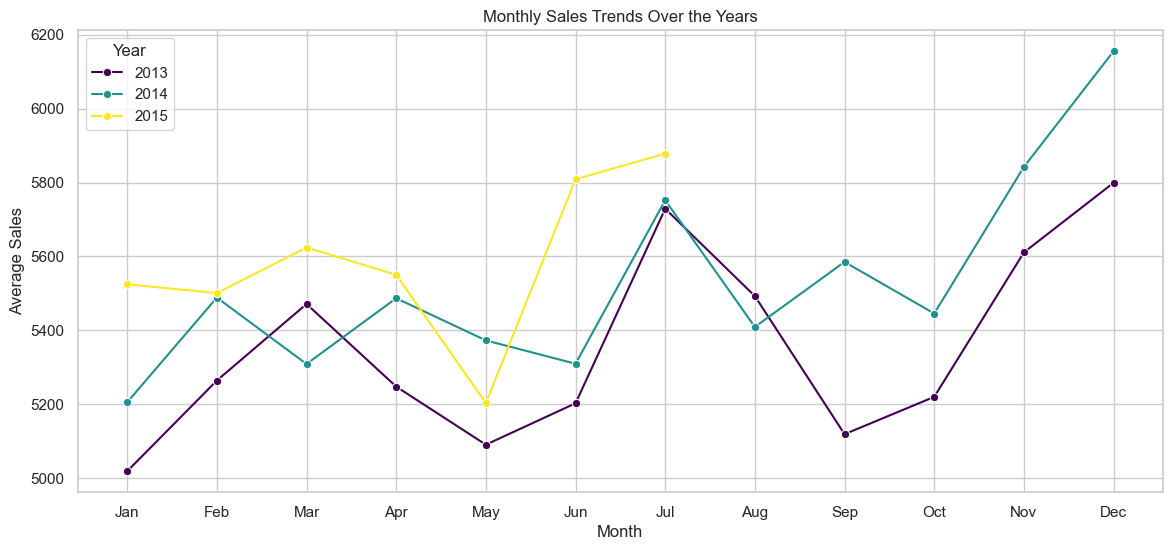

2025-03-11 18:36:05,600 - INFO - Monthly sales trends:
    Year  Month        Sales
0   2013      1  5018.126933
1   2013      2  5263.740905
2   2013      3  5471.033866
3   2013      4  5247.345877
4   2013      5  5090.082101
5   2013      6  5202.192421
6   2013      7  5728.983428
7   2013      8  5492.475670
8   2013      9  5118.485488
9   2013     10  5219.555798
10  2013     11  5610.726331
11  2013     12  5799.266610
12  2014      1  5204.954767
13  2014      2  5488.385547
14  2014      3  5308.571721
15  2014      4  5486.593983
16  2014      5  5372.439071
17  2014      6  5309.298846
18  2014      7  5752.098187
19  2014      8  5408.895725
20  2014      9  5584.920980
21  2014     10  5445.282373
22  2014     11  5842.305744
23  2014     12  6155.462612
24  2015      1  5524.393581
25  2015      2  5500.630301
26  2015      3  5623.969054
27  2015      4  5550.186716
28  2015      5  5202.806497
29  2015      6  5808.674892
30  2015      7  5878.426912
2025-03-11 18:36:

In [8]:
reload(spb)

spb.seasonal_behavior(train_df)

# Correlation Between Sales and Number of Customers
Examine the correlation between sales and the number of customers.

2025-03-11 18:38:11,439 - INFO - Correlation between Sales and Customers: 0.8868


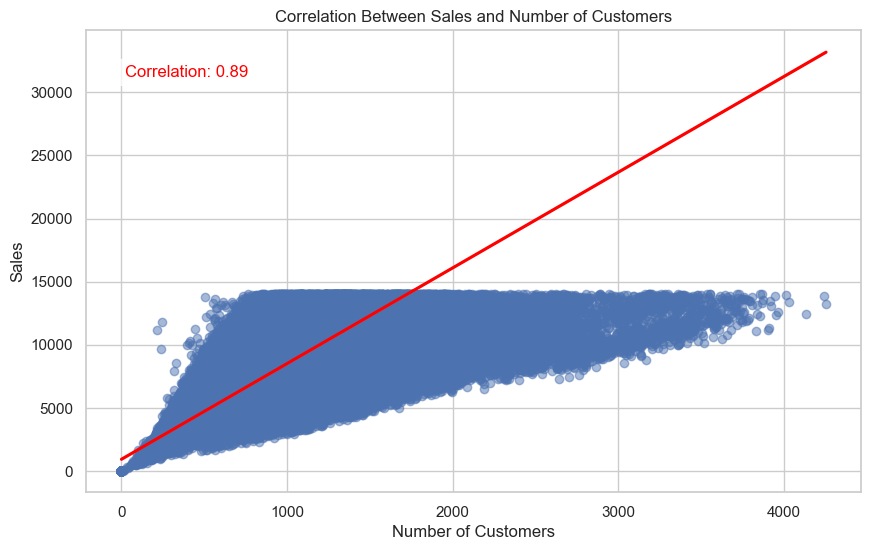

2025-03-11 18:40:48,300 - INFO - Correlation analysis completed successfully. Plot saved as correlation_sales_customers.png.


In [9]:
reload(cr)

cr.correlation(train_df)

# Effect of Promotions on Sales
Analyze how promotions affect sales and whether they attract more customers.

2025-01-03 09:34:03,471 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/effect_of_promotions.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=promo_sales, palette='viridis')
2025-01-03 09:34:03,485 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


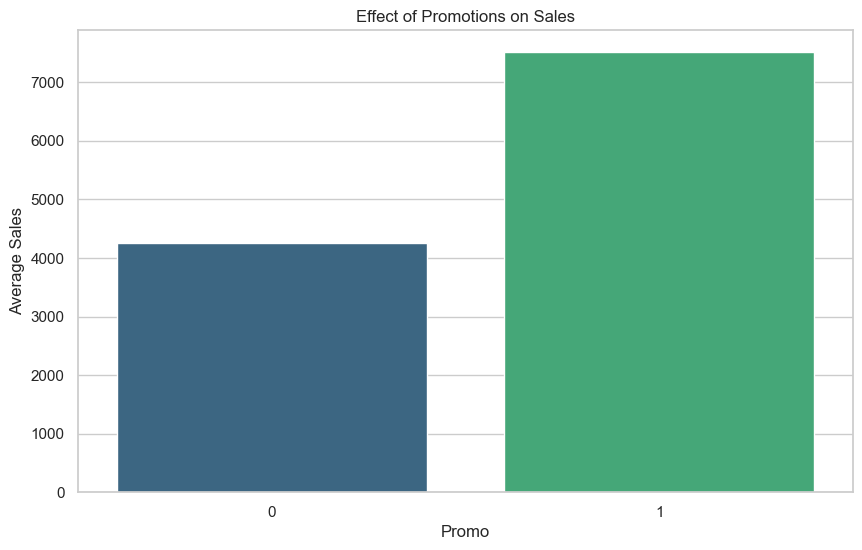

2025-01-03 09:34:03,661 - INFO - Effect of promotions on sales:
   Promo        Sales
0      0  4250.614772
1      1  7512.835578
2025-01-03 09:34:03,707 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/effect_of_promotions.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=promo_customers, palette='viridis')
2025-01-03 09:34:03,717 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


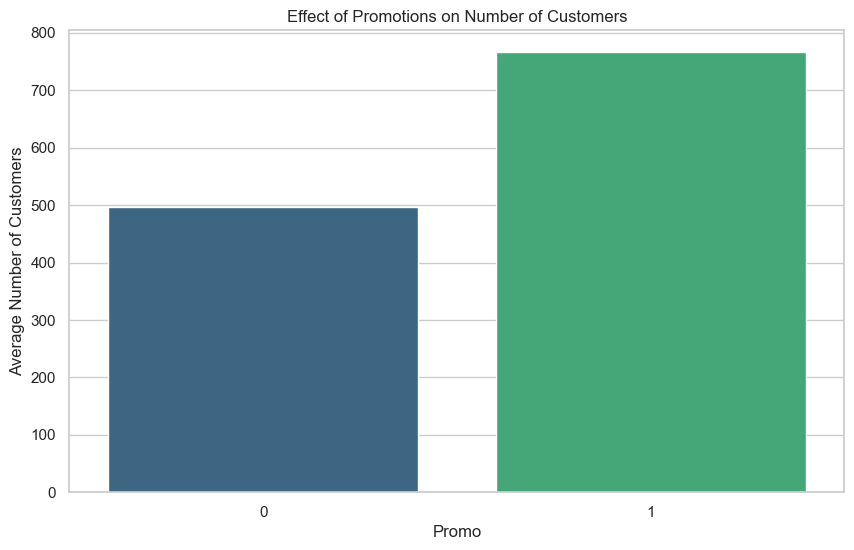

2025-01-03 09:34:03,881 - INFO - Effect of promotions on number of customers:
   Promo   Customers
0      0  496.013235
1      1  766.256424


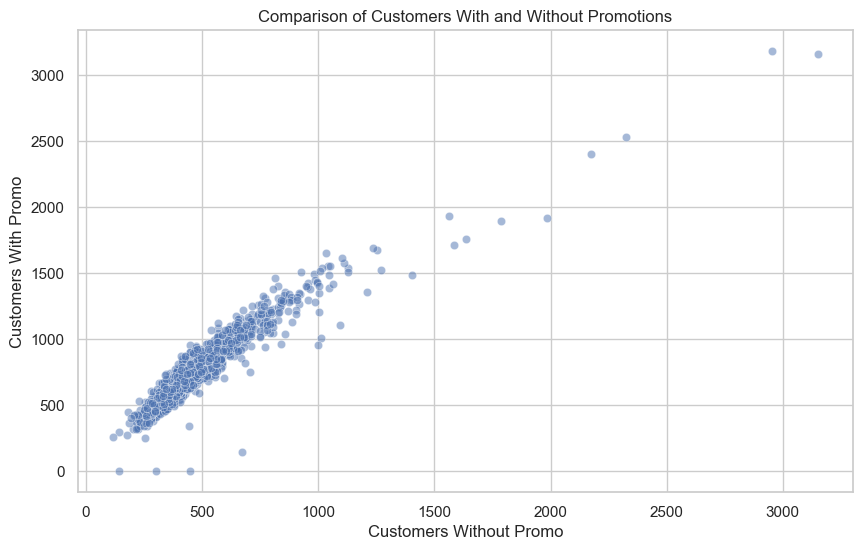

2025-01-03 09:34:04,311 - INFO - Comparison of customers with and without promotions:
      Store  Customers_NoPromo  Customers_Promo
0         1         399.682131       577.522222
1         2         366.876289       678.702778
2         3         475.549053       847.837535
3         4         920.317627      1342.779710
4         5         325.092784       637.177778
...     ...                ...              ...
1108   1111         283.484536       519.152778
1109   1112         533.075731       856.778626
1110   1113         495.946552       754.250000
1111   1114         115.757764       259.500000
1112   1115         297.800687       457.122222

[1113 rows x 3 columns]


In [10]:
reload(eop)

eop.effect_of_promotion(train_df)

# Effectiveness of Promotions
Determine if promotions could be deployed more effectively and identify which stores should have promotions.

2025-01-03 09:34:04,421 - INFO - Average sales per store with and without promotions:
      Store  NoPromo_Sales   Promo_Sales  Sales_Difference
0         1    3198.994845   5152.886111       1953.891266
1         2    2855.058419   6172.816667       3317.758247
2         3    3949.535284   8555.263305       4605.728021
3         4    6428.539267  10152.252174       3723.712907
4         5    2582.271478   5944.266667       3361.995189
...     ...            ...           ...               ...
1110   1111    3073.487973   6395.294444       3321.806472
1111   1112    5959.958692  10841.736641       4881.777949
1112   1113    4363.248276   7320.086111       2956.837835
1113   1114     746.099379   1701.625000        955.525621
1114   1115    4082.221649   7073.266667       2991.045017

[1115 rows x 4 columns]
2025-01-03 09:34:04,442 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to t

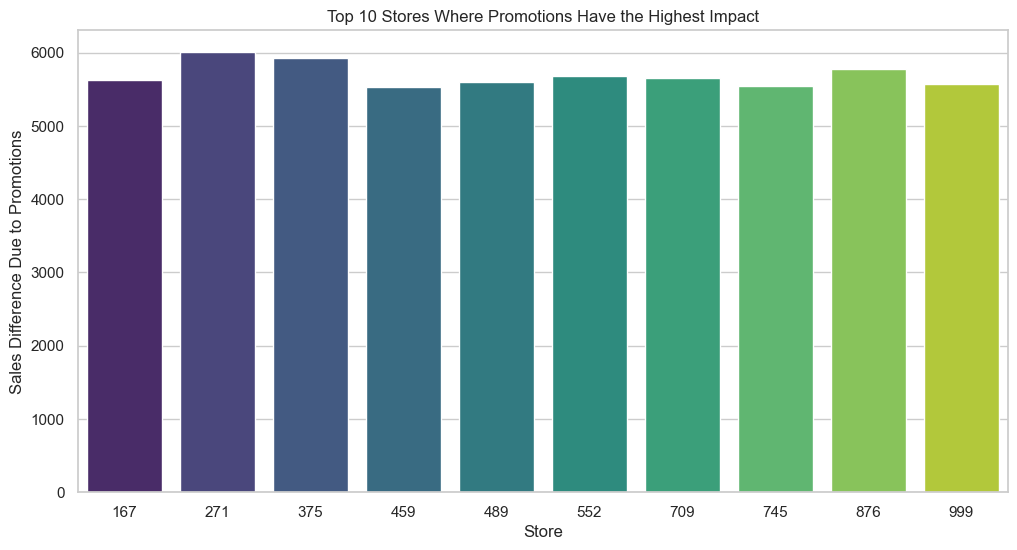

2025-01-03 09:34:04,725 - INFO - Top 10 stores where promotions have the highest impact:
     Store  NoPromo_Sales   Promo_Sales  Sales_Difference
270    271    3974.017241   9980.522796       6006.505555
374    375    4862.379965  10785.871972       5923.492007
875    876    4647.055749  10427.787313       5780.731564
551    552    4008.190722   9693.301538       5685.110817
708    709    5849.946735  11502.355482       5652.408746
166    167    5190.789292  10812.917492       5622.128200
488    489    3791.017182   9388.880466       5597.863284
998    999    5096.148532  10673.000000       5576.851468
744    745    3994.487091   9534.899135       5540.412044
458    459    5277.877797  10804.828025       5526.950229
2025-01-03 09:34:04,748 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-

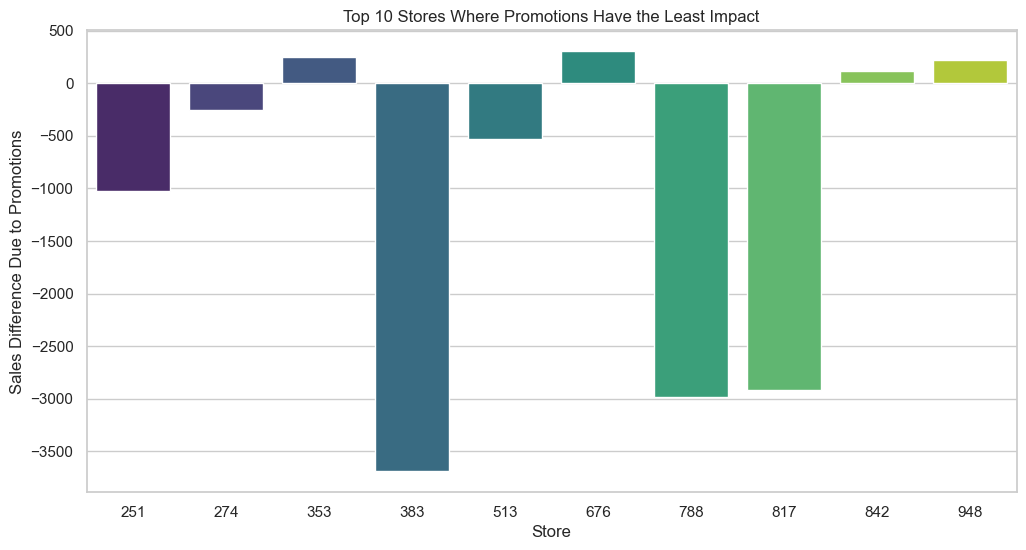

2025-01-03 09:34:05,196 - INFO - Top 10 stores where promotions have the least impact:
     Store  NoPromo_Sales  Promo_Sales  Sales_Difference
382    383    4834.268908  1145.083333      -3689.185574
787    788    2981.297436     0.000000      -2981.297436
816    817    2920.664975     0.000000      -2920.664975
250    251    1024.970060     0.000000      -1024.970060
512    513    3555.894231  3020.777778       -535.116453
273    274    4124.945017  3870.261111       -254.683906
841    842    3722.028571  3835.352941        113.324370
947    948    6731.865517  6953.597222        221.731705
352    353    5483.197595  5734.866667        251.669072
675    676    7265.118674  7568.738764        303.620090
2025-01-03 09:34:05,197 - INFO - Average sales difference due to promotions across all stores: 3337.2933598983423
2025-01-03 09:34:05,205 - INFO - Stores where promotions are less effective than the average:
      Store  NoPromo_Sales  Promo_Sales  Sales_Difference
0         1    3198.

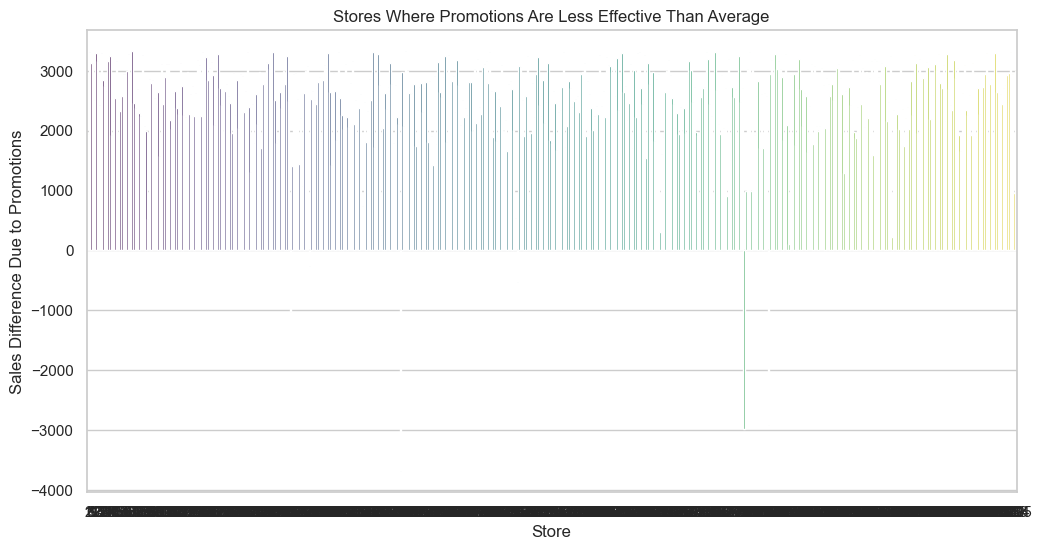

2025-01-03 09:34:13,041 - INFO - Effectiveness of promotions analysis completed successfully


In [11]:
reload(effop)

effop.effectiviness(train_df)

# Customer Behavior During Store Opening and Closing Times
Analyze trends of customer behavior during store opening and closing times.

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/customer_behavior.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  open_sales = train_df.groupby('Open')['Sales'].mean().reset_index()
2025-01-03 09:34:13,109 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/customer_behavior.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Open', y='Sales', data=open_sales, palette='viridis')
2025-01-03 09:34:13,128 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


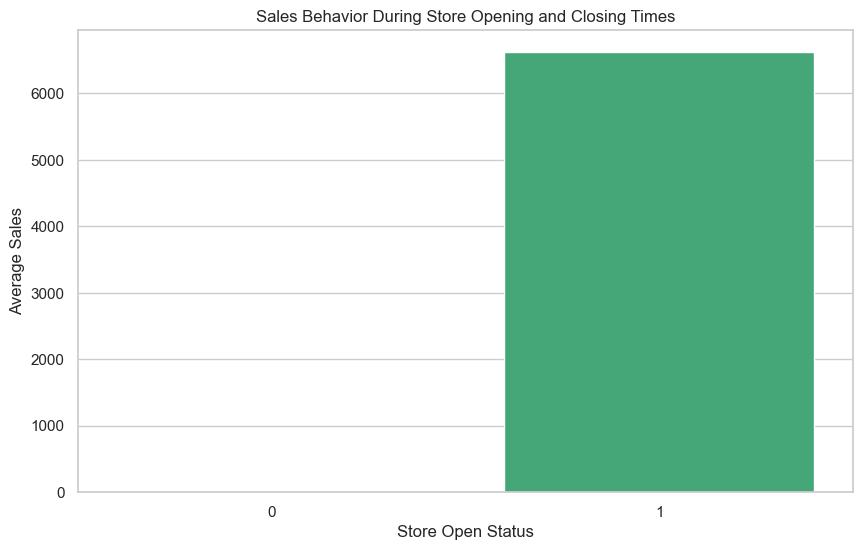

2025-01-03 09:34:13,295 - INFO - Sales behavior during store opening and closing times:
  Open       Sales
0    0     0.00000
1    1  6620.66938
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/customer_behavior.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  open_customers = train_df.groupby('Open')['Customers'].mean().reset_index()
2025-01-03 09:34:13,331 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/customer_behavior.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

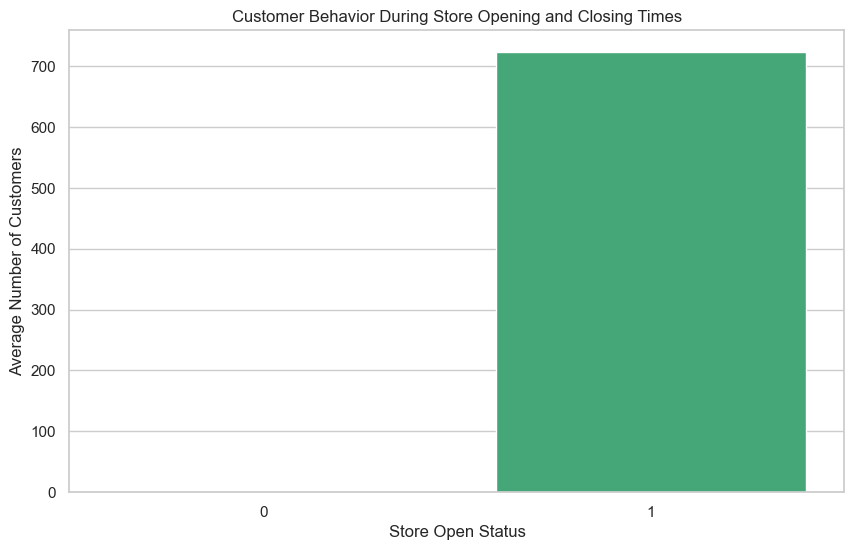

2025-01-03 09:34:13,538 - INFO - Customer behavior during store opening and closing times:
  Open   Customers
0    0    0.000000
1    1  722.759955


In [12]:
reload(cb)

cb.behavior(train_df)

# Sales on Weekends for Stores Open on All Weekdays
Check which stores are open on all weekdays and how that affects their sales on weekends.

2025-01-03 09:34:14,141 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/average_sale_on_weekend.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=weekend_sales_mean, palette='viridis')
2025-01-03 09:34:14,155 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


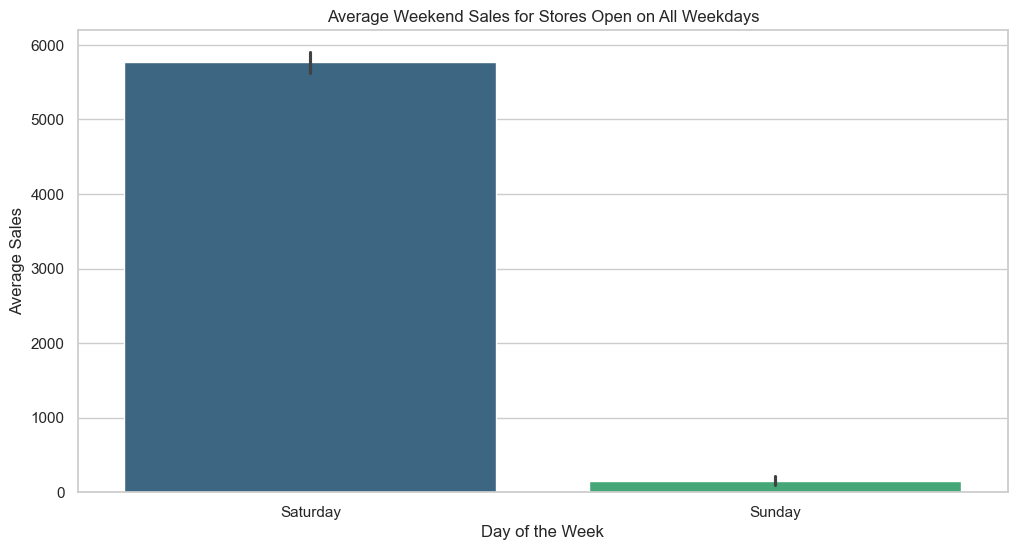

2025-01-03 09:34:14,419 - INFO - Average weekend sales for stores open on all weekdays:
      Store  DayOfWeek        Sales
0         1          5  4942.970149
1         1          6     0.000000
2         2          5  2873.104478
3         2          6     0.000000
4         3          5  4434.641791
...     ...        ...          ...
2221   1113          5  5893.574627
2222   1113          6     0.000000
2223   1114          6     0.000000
2224   1115          5  6773.388060
2225   1115          6     0.000000

[2226 rows x 3 columns]


In [13]:
reload(asow)

asow.weekendSale(train_df)

# Effect of Assortment Type on Sales
Analyze how the assortment type affects sales.

2025-01-03 09:34:15,115 - INFO - Merged train_df with store_df to include assortment type information
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/effect_of_assortment.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='viridis')


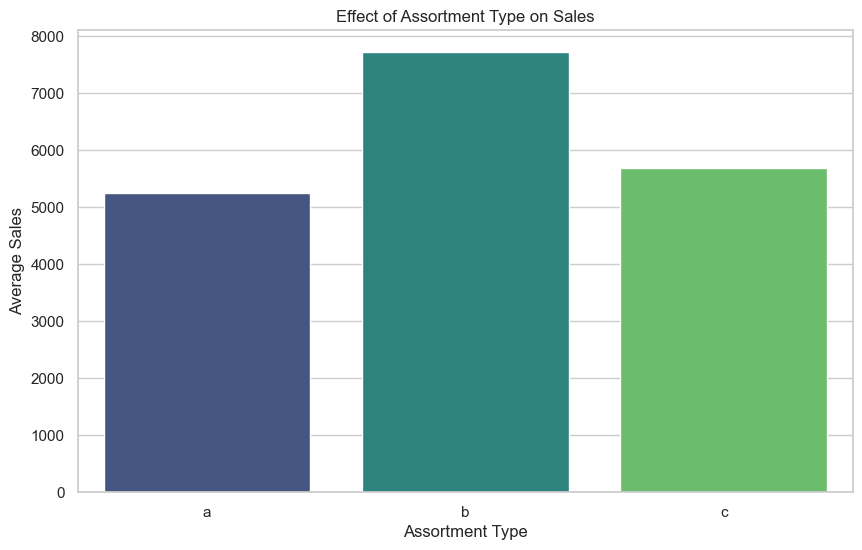

2025-01-03 09:34:15,394 - INFO - Effect of assortment type on sales:
  Assortment        Sales
0          a  5247.673340
1          b  7719.221729
2          c  5680.614393


In [14]:
reload(eoa)

eoa.assortmentEffect(train_df, store_df)

# Effect of Distance to Competitors on Sales
Examine how the distance to the next competitor affects sales, especially in city centers.

2025-01-03 09:34:16,008 - INFO - Merged train_df with store_df to include competitor distance information
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-4/scripts/effect_of_distance.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store_df['CompetitionDistance'].fillna(train_store_df['CompetitionDistance'].median(), inplace=True)
2025-01-03 09:34:16,049 - INFO - Handled missing values in CompetitionDistance column


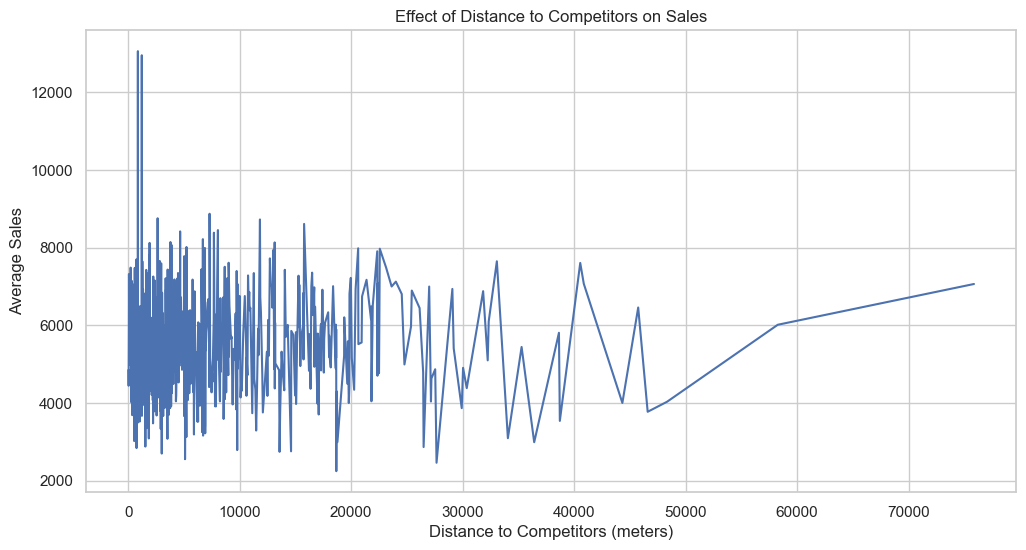

2025-01-03 09:34:16,304 - INFO - Effect of distance to competitors on sales:
     CompetitionDistance        Sales
0                   20.0  4851.175345
1                   30.0  4443.948811
2                   40.0  6005.085337
3                   50.0  6014.517436
4                   60.0  7321.025901
..                   ...          ...
649              45740.0  6459.118093
650              46590.0  3773.877919
651              48330.0  4032.547771
652              58260.0  6014.961538
653              75860.0  7064.387309

[654 rows x 2 columns]


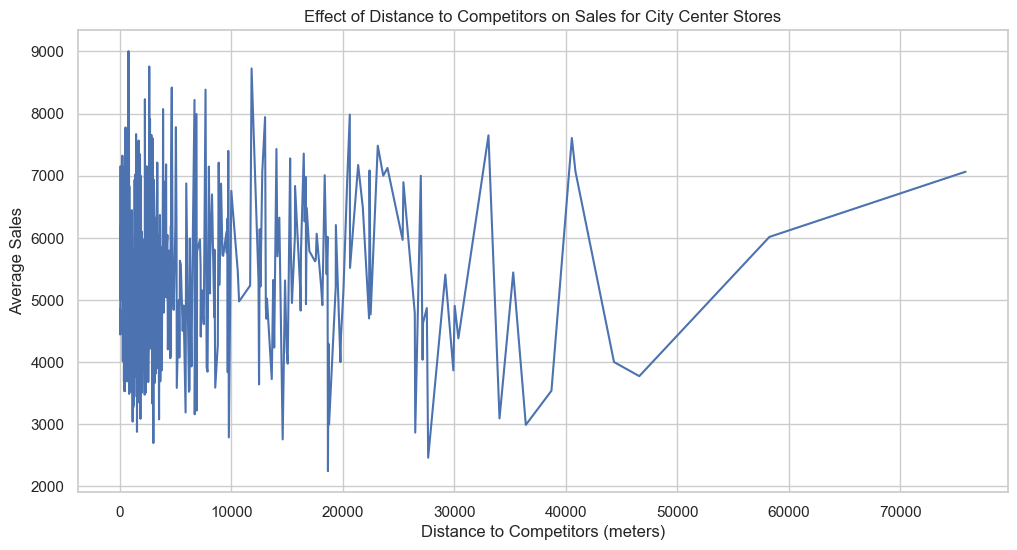

2025-01-03 09:34:16,716 - INFO - Effect of distance to competitors on sales for city center stores:
     CompetitionDistance        Sales
0                   20.0  4851.175345
1                   30.0  4443.948811
2                   40.0  6180.726605
3                   50.0  6105.989651
4                   60.0  7154.155911
..                   ...          ...
385              40860.0  7069.660194
386              44320.0  4001.506369
387              46590.0  3773.877919
388              58260.0  6014.961538
389              75860.0  7064.387309

[390 rows x 2 columns]


In [15]:
reload(eod)

eod.distanceEffect(train_df, store_df)